<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (2)

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일을 읽어와 titanic 데이터프레임을 선언하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
- 1-3) PassengerId, Name, Ticket, Cabin 열을 한 번에 제거하세요.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
titanic = pd.read_csv(path)

In [23]:
columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic.drop(columns=columns, axis=1, inplace=True)

2) 상위 5개 행을 확인하세요.

In [24]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


3) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 3-1) Age 열 결측치를 Age 열 평균으로 채우세요.
- 3-2) Embarked 열 결측치를 'S'로 채우세요.
- 3-3) 각 열에 결측치가 남아있는지 확인하세요.

In [25]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
# titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True) 
titanic['Embarked'].fillna('S', inplace=True)  # 최빈값, mode()
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 4-1) groupby 메서드를 사용해 Pclass 별 탑승자 수를 집계하여 tmp 데이터프레임으로 선언하세요.
    - 탑승자 수는 Survived 열 처럼 결측치가 없는 열의 count()로 집계 가능합니다.
- 4-2) tmp 데이터프레임의 Survived 열 이름을 Count로 변경하세요.
- 4-3) tmp 데이터프레임을 막대 그래프로 시각화해 확인하세요.

In [28]:
tmp = titanic.groupby('Pclass', as_index=False)[['Survived']].count()
tmp

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [30]:
tmp.columns = ['Pclass', 'Count']
tmp

,Pclass,Count
0,1,216
1,2,184
2,3,491


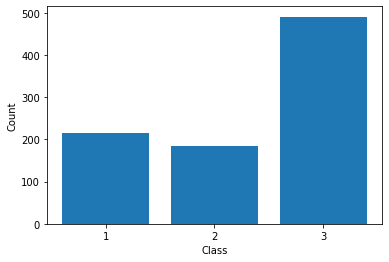

In [31]:
plt.bar(tmp['Pclass'].astype(str), tmp['Count'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

5) Pclass, Sex, Embarked 열을 한 번에 가변수화하세요. 단, 다중공선성 문제가 없도록 범주값 개수보다 하나 적은 수의 열이 만들어지게 하세요.

In [32]:
dumm_cols = ['Pclass', 'Sex', 'Embarked']

titanic = pd.get_dummies(titanic, columns=dumm_cols, drop_first=True, dtype=int)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
